# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

## Pacotes

In [1]:
# Pacotes

import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import numpy             as np

from sklearn.tree          import DecisionTreeClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler

## Dataframe

In [2]:
# Dataframe

filename_features = "./Dados/UCI HAR Dataset/features.txt"
filename_labels = "./Dados/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "./Dados/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "./Dados/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "./Dados/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "./Dados/UCI HAR Dataset/test/subject_test.txt"
filename_xtest = "./Dados/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "./Dados/UCI HAR Dataset/test/y_test.txt"

# Carregar o arquivo de features
features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#")['nome_var']

# Carregar os rótulos
labels = pd.read_csv(filename_labels, sep='\s+', header=None, names=['cod_label', 'label'])

# Carregar os dados de treino
subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'])['subject_id']
X_train = pd.read_csv(filename_xtrain, sep='\s+', header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

# Carregar os dados de teste
subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'])['subject_id']
X_test = pd.read_csv(filename_xtest, sep='\s+', header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])


## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [3]:
%%time

#Concatenar
data = pd.concat([X_train, X_test], axis=0)

#Padronizar
def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: total: 281 ms
Wall time: 259 ms


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


In [4]:
# PCA sem padronização
pca = PCA()
pca.fit(data)
var_explicada = pca.explained_variance_ratio_

# PCA com padronização
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca_scaled = PCA()
pca_scaled.fit(data_scaled)
var_explicada_escaled = pca_scaled.explained_variance_ratio_


# Variancias
var_acumulada = np.cumsum(var_explicada)
var_acumulada_explicada = np.cumsum(var_explicada_escaled)

# Numero de componentes para ter 90% variancia
num_componentes = np.argmax(var_acumulada >= 0.90) +1
num_componentes_explicada = np.argmax(var_acumulada_explicada >= 0.90) +1


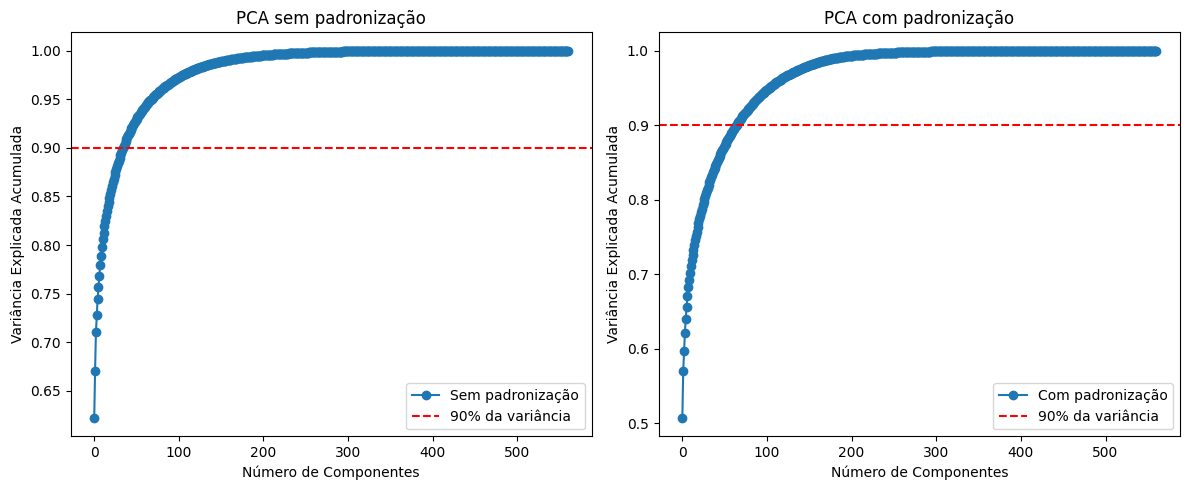

Número de componentes necessárias para explicar 90% da variância (sem padronização): 36
Número de componentes necessárias para explicar 90% da variância (com padronização): 65


In [5]:
# Plotar gráficos
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(var_acumulada, marker='o', label='Sem padronização')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% da variância')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.legend()
plt.title('PCA sem padronização')

plt.subplot(1, 2, 2)
plt.plot(var_acumulada_explicada, marker='o', label='Com padronização')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% da variância')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.legend()
plt.title('PCA com padronização')

plt.tight_layout()
plt.show()

print(f"Número de componentes necessárias para explicar 90% da variância (sem padronização): {num_componentes}")
print(f"Número de componentes necessárias para explicar 90% da variância (com padronização): {num_componentes_explicada}")


## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [6]:
%%time
# Rótulos
filename_ytrain = "./Dados/UCI HAR Dataset/train/y_train.txt"
filename_ytest = "./Dados/UCI HAR Dataset/test/y_test.txt"

# Sem padronização (X)
pca_10 = PCA(n_components = 10)
X_train_pca = pca_10.fit_transform(X_train)
X_test_pca = pca_10.transform(X_test)

# Com padronização (X)
pca_10_explicada = PCA(n_components = 10)
X_train_explicada = pca_10_explicada.fit_transform(scaler.fit_transform(X_train))
X_test_explicada = pca_10_explicada.transform(scaler.fit_transform(X_test))

# Y
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])['cod_label']
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])['cod_label']


# Criar árvores de decisão
tree_padrao = DecisionTreeClassifier(ccp_alpha=0.001, random_state=27)
tree_explicada = DecisionTreeClassifier(ccp_alpha=0.001, random_state=27)

# Treinar modelos
tree_padrao.fit(X_train_pca, y_train)
tree_explicada.fit(X_train_explicada, y_train)

# Previsões
y_pred_train = tree_padrao.predict(X_train_pca)
y_pred_test = tree_padrao.predict(X_test_pca)

y_pred_train_explicada = tree_explicada.predict(X_train_explicada)
y_pred_test_explicada = tree_explicada.predict(X_test_explicada)

# Acurácias

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

acc_train_explicada = accuracy_score(y_train, y_pred_train_explicada)
acc_test_explicada = accuracy_score(y_test, y_pred_test_explicada)

# Exibir resultados
print(f"Acurácia na base de treino (sem padronização): {acc_train:.4f}")
print(f"Acurácia na base de teste (sem padronização): {acc_test:.4f}\n")
print(f"Acurácia na base de treino (com padronização): {acc_train_explicada:.4f}")
print(f"Acurácia na base de teste (com padronização): {acc_test_explicada:.4f}\n")


Acurácia na base de treino (sem padronização): 0.8935
Acurácia na base de teste (sem padronização): 0.8229

Acurácia na base de treino (com padronização): 0.8588
Acurácia na base de teste (com padronização): 0.7740

CPU times: total: 2 s
Wall time: 873 ms
